In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [11]:
health = pd.read_csv("자치구별 노인 건강(음주 여부 구분).csv")

health

FileNotFoundError: [Errno 2] No such file or directory: '자치구별 노인 건강(음주 여부 구분).csv'

In [4]:
health_1=health.drop(['지역'],axis=1)

c:\Users\gram\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': '건강 상관 히트맵'}>

c:\Users\gram\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\gram\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


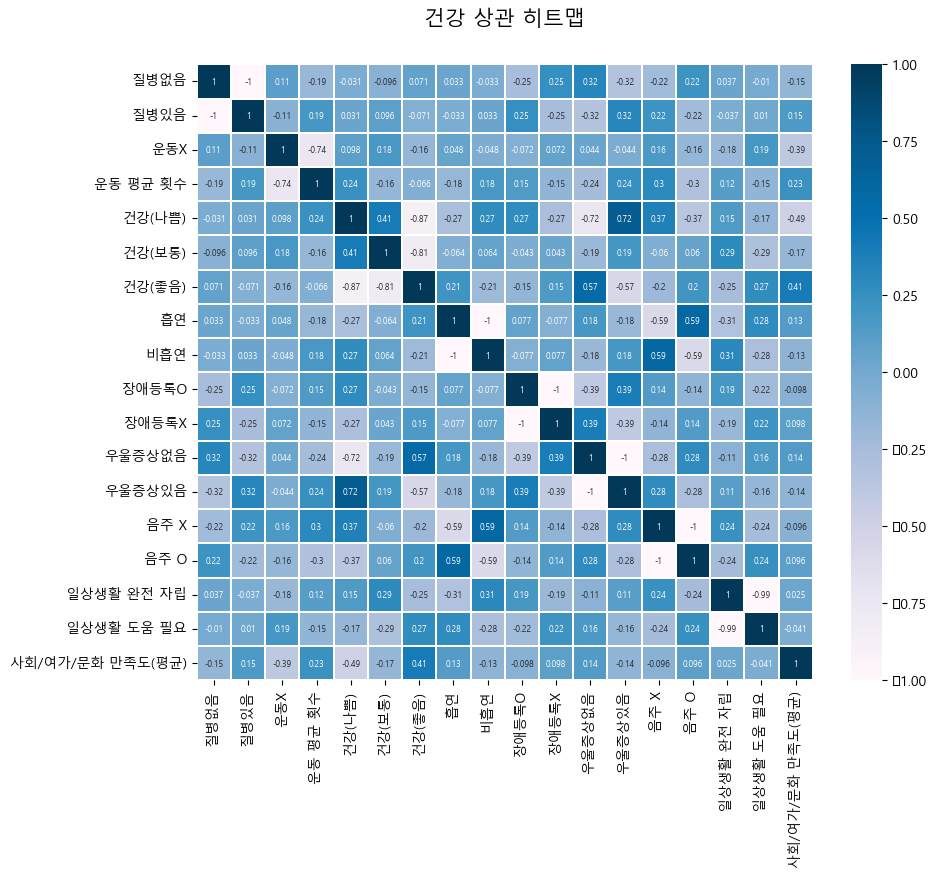

In [5]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("건강 상관 히트맵", y = 1.05, size = 15)
sns.heatmap(health_1.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" :6})

In [6]:
health_1.columns

Index(['질병없음', '질병있음', '운동X', '운동 평균 횟수', '건강(나쁨)', '건강(보통)', '건강(좋음)', '흡연',
       '비흡연', '장애등록O', '장애등록X', '우울증상없음', '우울증상있음', '음주 X', '음주 O',
       '일상생활 완전 자립', '일상생활 도움 필요', '사회/여가/문화 만족도(평균)'],
      dtype='object')

In [7]:
x = health_1[['일상생활 완전 자립', '일상생활 도움 필요']]

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=1)

In [10]:
pca.fit(x)

PCA(n_components=1)

In [11]:
pca.components_

array([[-0.71756786,  0.69648859]])

In [12]:
pca.explained_variance_ratio_

array([0.99716395])

In [13]:
health_1['일상생활 자립 여부'] = pca.transform(x)
health_1

,질병없음,질병있음,운동X,운동 평균 횟수,건강(나쁨),건강(보통),건강(좋음),흡연,비흡연,장애등록O,장애등록X,우울증상없음,우울증상있음,음주 X,음주 O,일상생활 완전 자립,일상생활 도움 필요,사회/여가/문화 만족도(평균),일상생활 자립 여부
0,0.143,0.857,0.119,2.7,0.078,0.295,0.627,0.021,0.979,0.000,1.000,0.893,0.107,0.717,0.283,0.877,0.124,0.034,-0.012684
1,0.242,0.758,0.609,1.2,0.189,0.347,0.464,0.193,0.807,0.038,0.962,0.928,0.072,0.638,0.362,0.858,0.136,0.030,0.009307
2,0.145,0.855,0.173,2.2,0.138,0.498,0.364,0.155,0.845,0.071,0.929,0.901,0.099,0.422,0.578,0.959,0.041,0.030,-0.129333
3,0.192,0.808,0.043,3.7,0.159,0.312,0.529,0.107,0.893,0.090,0.910,0.925,0.075,0.690,0.310,0.858,0.139,0.032,0.011397
4,0.176,0.824,0.169,3.5,0.190,0.240,0.570,0.138,0.862,0.064,0.936,0.816,0.184,0.726,0.274,0.846,0.126,0.031,0.010953
5,0.201,0.799,0.084,2.6,0.025,0.384,0.591,0.172,0.828,0.015,0.985,0.975,0.025,0.142,0.858,0.943,0.057,0.033,-0.106708
6,0.114,0.886,0.181,3.4,0.275,0.303,0.422,0.125,0.875,0.081,0.919,0.807,0.193,0.635,0.365,0.906,0.088,0.026,-0.058567
7,0.181,0.819,0.152,3.3,0.213,0.368,0.419,0.073,0.927,0.069,0.931,0.880,0.120,0.704,0.296,0.852,0.148,0.031,0.021971
8,0.185,0.815,0.230,2.7,0.199,0.414,0.386,0.174,0.826,0.082,0.918,0.912,0.088,0.467,0.533,0.815,0.162,0.033,0.058272
9,0.211,0.789,0.379,1.9,0.235,0.400,0.365,0.057,0.943,0.017,0.983,0.870,0.130,0.735,0.265,0.917,0.084,0.027,-0.069246


In [14]:
health_1.columns


Index(['질병없음', '질병있음', '운동X', '운동 평균 횟수', '건강(나쁨)', '건강(보통)', '건강(좋음)', '흡연',
       '비흡연', '장애등록O', '장애등록X', '우울증상없음', '우울증상있음', '음주 X', '음주 O',
       '일상생활 완전 자립', '일상생활 도움 필요', '사회/여가/문화 만족도(평균)', '일상생활 자립 여부'],
      dtype='object')

In [15]:
health_3=health_1[['질병있음', '운동X', '운동 평균 횟수','흡연','음주 O','우울증상있음','장애등록O','일상생활 도움 필요','건강(나쁨)','사회/여가/문화 만족도(평균)']]
health_3

,질병있음,운동X,운동 평균 횟수,흡연,음주 O,우울증상있음,장애등록O,일상생활 도움 필요,건강(나쁨),사회/여가/문화 만족도(평균)
0,0.857,0.119,2.7,0.021,0.283,0.107,0.000,0.124,0.078,0.034
1,0.758,0.609,1.2,0.193,0.362,0.072,0.038,0.136,0.189,0.030
2,0.855,0.173,2.2,0.155,0.578,0.099,0.071,0.041,0.138,0.030
3,0.808,0.043,3.7,0.107,0.310,0.075,0.090,0.139,0.159,0.032
4,0.824,0.169,3.5,0.138,0.274,0.184,0.064,0.126,0.190,0.031
5,0.799,0.084,2.6,0.172,0.858,0.025,0.015,0.057,0.025,0.033
6,0.886,0.181,3.4,0.125,0.365,0.193,0.081,0.088,0.275,0.026
7,0.819,0.152,3.3,0.073,0.296,0.120,0.069,0.148,0.213,0.031
8,0.815,0.230,2.7,0.174,0.533,0.088,0.082,0.162,0.199,0.033
9,0.789,0.379,1.9,0.057,0.265,0.130,0.017,0.084,0.235,0.027


In [16]:
#y = health_1[['질병없음', '질병있음']]

In [17]:
#pca.fit(y)

In [18]:
#health_1['질병 여부'] = pca.transform(y)

In [19]:
#z = health_1[['흡연', '비흡연']]

In [20]:
#pca.fit(z)

In [21]:
#health_1['흡연 여부'] = pca.transform(z)

In [22]:
# a = health_1[['장애등록O', '장애등록X']]
# pca.fit(a)
# health_1['장애 여부'] = pca.transform(a)
# health_1

In [23]:
# a = health_1[['건강(나쁨)', '건강(보통)','건강(좋음)']]
# pca.fit(a)
# health_1['건강 상태'] = pca.transform(a)
# health_1

In [24]:
# a = health_1[['우울증상없음', '우울증상있음']]
# pca.fit(a)
# health_1['우울증상 여부'] = pca.transform(a)


In [25]:
# a = health_1[['운동X', '운동 평균 횟수']]
# pca.fit(a)
# health_1['운동 여부'] = pca.transform(a)
# health_1

In [26]:
# a = health_1[['음주 X', '음주 O']]
# pca.fit(a)
# health_1['음주 여부'] = pca.transform(a)
# health_1

In [27]:
# health_1.columns

In [28]:
# health_2=health_1[['일상생활 자립 여부', '질병 여부','흡연 여부', '장애 여부', '건강 상태', '우울증상 여부', '운동 여부', '음주 여부']]
# health_2['만족도']=health_1['사회/여가/문화 만족도(평균)']

# health_2

c:\Users\gram\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: title={'center': '건강 상관 히트맵'}>

c:\Users\gram\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\gram\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


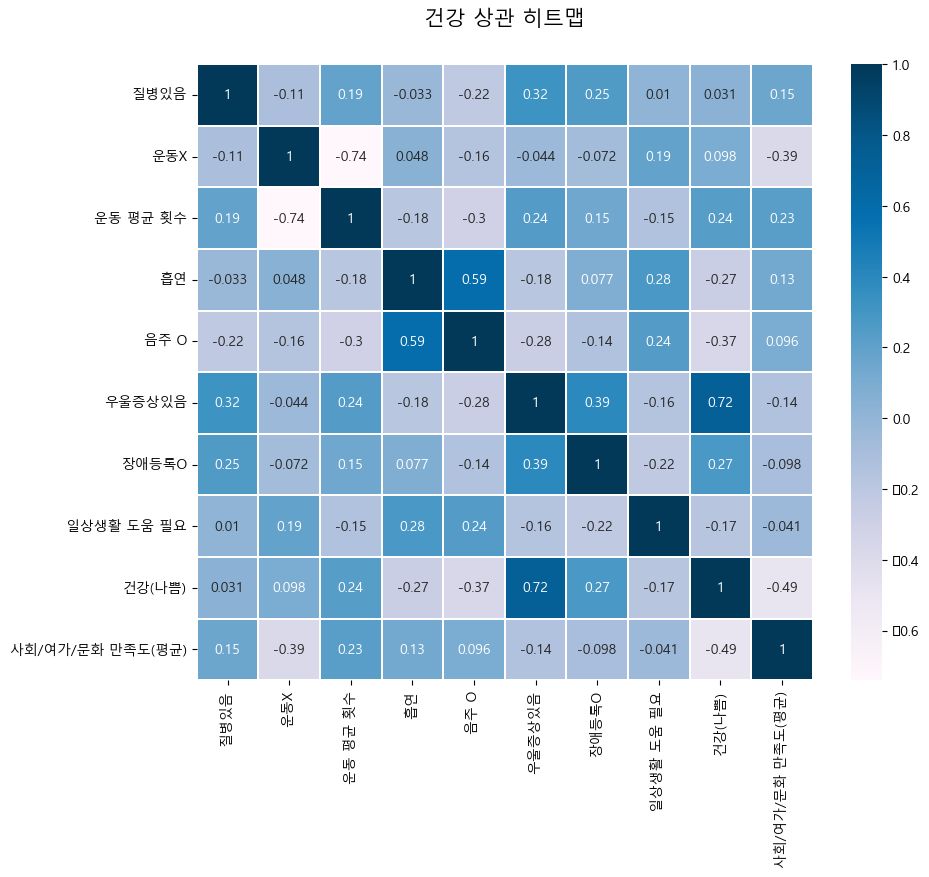

In [29]:
#히트맵 생성
plt.figure(figsize=(10, 8))
plt.title("건강 상관 히트맵", y = 1.05, size = 15)
sns.heatmap(health_3.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" :10})

In [30]:
import pandas as pd
import statsmodels.api as sm

In [31]:
health_3.columns

Index(['질병있음', '운동X', '운동 평균 횟수', '흡연', '음주 O', '우울증상있음', '장애등록O',
       '일상생활 도움 필요', '건강(나쁨)', '사회/여가/문화 만족도(평균)'],
      dtype='object')

In [58]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats


# List of column names for which to calculate correlations
column_names = health_3.columns

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(health_3), columns=column_names)

# 독립 변수와 종속 변수를 분리합니다
X = scaled_df.drop(['사회/여가/문화 만족도(평균)'], axis=1)  # 종속 변수를 제외한 나머지 변수를 독립 변수로 설정
y = scaled_df['사회/여가/문화 만족도(평균)']  # 종속 변수 설정

scaled_df

,질병있음,운동X,운동 평균 횟수,흡연,음주 O,우울증상있음,장애등록O,일상생활 도움 필요,건강(나쁨),사회/여가/문화 만족도(평균)
0,0.757085,0.134276,0.60,0.000000,0.051136,0.311189,0.000000,0.312865,0.222222,1.000
1,0.356275,1.000000,0.00,0.988506,0.163352,0.188811,0.348624,0.347953,0.538462,0.500
2,0.748988,0.229682,0.40,0.770115,0.470170,0.283217,0.651376,0.070175,0.393162,0.500
3,0.558704,0.000000,1.00,0.494253,0.089489,0.199301,0.825688,0.356725,0.452991,0.750
4,0.623482,0.222615,0.92,0.672414,0.038352,0.580420,0.587156,0.318713,0.541311,0.625
5,0.522267,0.072438,0.56,0.867816,0.867898,0.024476,0.137615,0.116959,0.071225,0.875
6,0.874494,0.243816,0.88,0.597701,0.167614,0.611888,0.743119,0.207602,0.783476,0.000
7,0.603239,0.192580,0.84,0.298851,0.069602,0.356643,0.633028,0.383041,0.606838,0.625
8,0.587045,0.330389,0.60,0.879310,0.406250,0.244755,0.752294,0.423977,0.566952,0.875
9,0.481781,0.593640,0.28,0.206897,0.025568,0.391608,0.155963,0.195906,0.669516,0.125


OLS

In [59]:
#OLS

import numpy as np
import pandas as pd
import statsmodels.api as sm


# Add a constant term to the X matrix for the intercept
X_1 = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X_1).fit()

# Get regression coefficients
coefficients = model.params[1:]  # Exclude the intercept

# Normalize coefficients to get weights
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

# Print the weights
print("Regression Coefficient-based Weights:")
print(weights)

Regression Coefficient-based Weights:
질병있음          0.000771
운동X           0.093643
운동 평균 횟수      0.075835
흡연            0.061864
음주 O          0.066369
우울증상있음        0.220212
장애등록O         0.056737
일상생활 도움 필요    0.044238
건강(나쁨)        0.380329
dtype: float64


In [76]:
#OLS

import numpy as np
import pandas as pd
import statsmodels.api as sm


# Add a constant term to the X matrix for the intercept
X_1 = sm.add_constant(X)

# Perform multiple linear regression
model = sm.OLS(y, X_1).fit()

# Get regression coefficients
coefficients = model.params[1:]  # Exclude the intercept

# Normalize coefficients to get weights
OLS_weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

# 점수 계산
OLS_scores = []
for i in range(len(X_1)):
    score = np.dot(X.iloc[i], OLS_weights)    
    OLS_scores.append(score)

# 결과를 데이터프레임으로 변환
OLS_df = pd.DataFrame({'Indicator_Score': OLS_scores})

# 결과 출력
OLS_df

,Indicator_Score
0,0.228939
1,0.447457
2,0.383228
3,0.391584
4,0.516344
5,0.206403
6,0.622412
7,0.467505
8,0.489218
9,0.450081


In [77]:
X

,질병있음,운동X,운동 평균 횟수,흡연,음주 O,우울증상있음,장애등록O,일상생활 도움 필요,건강(나쁨)
0,0.757085,0.134276,0.60,0.000000,0.051136,0.311189,0.000000,0.312865,0.222222
1,0.356275,1.000000,0.00,0.988506,0.163352,0.188811,0.348624,0.347953,0.538462
2,0.748988,0.229682,0.40,0.770115,0.470170,0.283217,0.651376,0.070175,0.393162
3,0.558704,0.000000,1.00,0.494253,0.089489,0.199301,0.825688,0.356725,0.452991
4,0.623482,0.222615,0.92,0.672414,0.038352,0.580420,0.587156,0.318713,0.541311
5,0.522267,0.072438,0.56,0.867816,0.867898,0.024476,0.137615,0.116959,0.071225
6,0.874494,0.243816,0.88,0.597701,0.167614,0.611888,0.743119,0.207602,0.783476
7,0.603239,0.192580,0.84,0.298851,0.069602,0.356643,0.633028,0.383041,0.606838
8,0.587045,0.330389,0.60,0.879310,0.406250,0.244755,0.752294,0.423977,0.566952
9,0.481781,0.593640,0.28,0.206897,0.025568,0.391608,0.155963,0.195906,0.669516


In [84]:
OLS_df

,자치구,건강 점수(OLS)
0,강남구,0.388356
1,강동구,0.456455
2,강북구,0.521992
3,강서구,0.463411
4,관악구,0.537144
5,광진구,0.453771
6,구로구,0.625731
7,금천구,0.464954
8,노원구,0.540501
9,도봉구,0.369697


In [86]:
# 건강 점수에 5를 곱한 새로운 열 추가
OLS_scores_df = OLS_df['건강 점수(OLS)'] * 5
OLS_df['건강 점수(곱셈)'] = OLS_scores_df

OLS_df

,자치구,건강 점수(OLS),건강 점수(곱셈)
0,강남구,0.388356,1.941781
1,강동구,0.456455,2.282276
2,강북구,0.521992,2.609959
3,강서구,0.463411,2.317057
4,관악구,0.537144,2.685719
5,광진구,0.453771,2.268856
6,구로구,0.625731,3.128655
7,금천구,0.464954,2.324770
8,노원구,0.540501,2.702505
9,도봉구,0.369697,1.848487


PCA

In [78]:
#PCA

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

pca = PCA()
principal_components = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
PCA_weights = explained_variance_ratio / np.sum(explained_variance_ratio)

# Print the weights
print("PCA-based Weights:")
for i, PCA_weights in enumerate(PCA_weights):
    print(f"Variable {i + 1}: {PCA_weights:.3f}")

PCA-based Weights:
Variable 1: 0.308
Variable 2: 0.182
Variable 3: 0.163
Variable 4: 0.109
Variable 5: 0.095
Variable 6: 0.063
Variable 7: 0.051
Variable 8: 0.021
Variable 9: 0.009


In [36]:
# PCA_wei

In [87]:
PCA_weights

array([0.30799047, 0.18208875, 0.16322749, 0.10879978, 0.09486223,
       0.06256219, 0.05072532, 0.02057879, 0.00916499])

In [79]:
import pandas as pd

# PCA 및 가중치 계산
pca = PCA()
principal_components = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
PCA_weights = explained_variance_ratio / np.sum(explained_variance_ratio)

# 점수 계산
indicator_scores = []
for i in range(len(X)):
    score = np.dot(X.iloc[i], PCA_weights)    
    indicator_scores.append(score)

# 결과를 데이터프레임으로 변환
indicator_scores_df = pd.DataFrame({'Indicator_Score': indicator_scores})

# 결과 출력
indicator_scores_df


,Indicator_Score
0,0.388356
1,0.456455
2,0.521992
3,0.463411
4,0.537144
5,0.453771
6,0.625731
7,0.464954
8,0.540501
9,0.369697


In [80]:
# '자치구' 열 추가
indicator_scores_df = pd.DataFrame({'자치구': health['지역'], '건강 점수': indicator_scores})
indicator_scores_df

indicator_scores_df.set_index(keys='자치구')


,건강 점수
자치구,
강남구,0.388356
강동구,0.456455
강북구,0.521992
강서구,0.463411
관악구,0.537144
광진구,0.453771
구로구,0.625731
금천구,0.464954
노원구,0.540501


In [89]:
# 건강 점수에 5를 곱한 새로운 열 추가
indicator_scores = indicator_scores_df['건강 점수'] * 5
indicator_scores_df['건강 점수(곱셈)'] = indicator_scores

indicator_scores_df

,자치구,건강 점수,건강 점수(곱셈)
0,강남구,0.388356,1.941781
1,강동구,0.456455,2.282276
2,강북구,0.521992,2.609959
3,강서구,0.463411,2.317057
4,관악구,0.537144,2.685719
5,광진구,0.453771,2.268856
6,구로구,0.625731,3.128655
7,금천구,0.464954,2.324770
8,노원구,0.540501,2.702505
9,도봉구,0.369697,1.848487
